In [1]:
from sklearn.datasets import make_classification

In [2]:
# Генерация выборки с использованием make_classification
X, y = make_classification(n_samples=100,
                           n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           n_clusters_per_class=1,
                           n_classes=4,
                           random_state=3,
                           class_sep=2)

### Отображение выборки на графике

In [3]:
import matplotlib.pyplot as plt

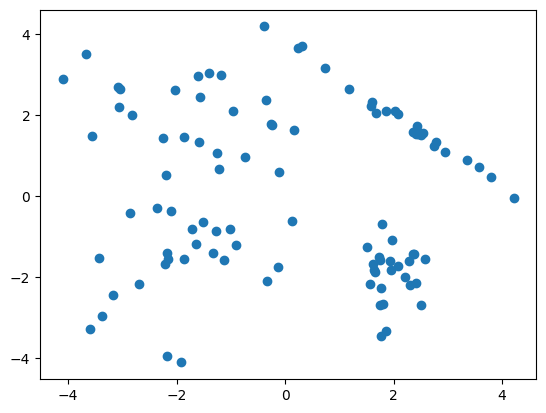

In [4]:
plt.scatter(X[:, 0], X[:, 1])

### импорт для кластеризации

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram

### Иерархическая кластеризация выборки

In [6]:
mergings_single = linkage(X, method='single')
mergings_complete = linkage(X, method='complete')
mergings_ward = linkage(X, method='ward')

Text(0.5, 1.0, 'Расстояние Уорда')

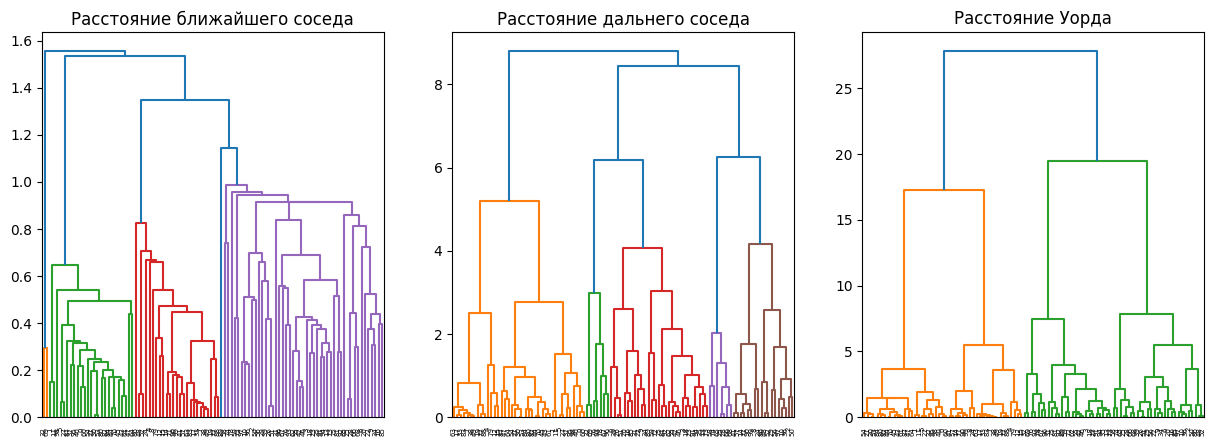

In [7]:
# Расстояние ближайшего соседа (single)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
dendrogram(mergings_single, ax=axes[0])
axes[0].set_title('Расстояние ближайшего соседа')

# Расстояние дальнего соседа (complete)
dendrogram(mergings_complete, ax=axes[1])
axes[1].set_title('Расстояние дальнего соседа')

# Расстояние Уорда (Ward)
dendrogram(mergings_ward, ax=axes[2])
axes[2].set_title('Расстояние Уорда')


### Выбор лучшего разбиения

In [8]:
mergings_ward = linkage(X, method='ward')


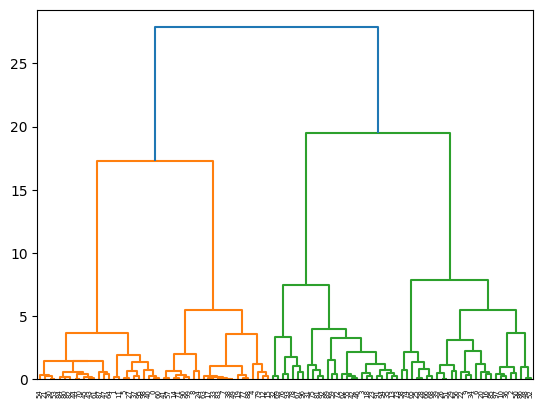

In [9]:
dendrogram(mergings_ward)
plt.show()

In [10]:
import numpy as np

def update_cluster_centers(X, c):
    centers = np.zeros((4, 2))
    for i in range(1, 5):
        ix = np.where(c == i)
        centers[i - 1, :] = np.mean(X[ix, :], axis=1)
    return centers

In [11]:
from scipy.cluster.hierarchy import fcluster

In [12]:
T = fcluster(mergings_ward, 4, criterion='maxclust')
clusters = update_cluster_centers(X, T)
clusters

array([[ 1.9656608 , -1.93312676],
       [ 2.42427308,  1.6015969 ],
       [-1.89111647, -1.54585632],
       [-1.54233588,  2.22413702]])

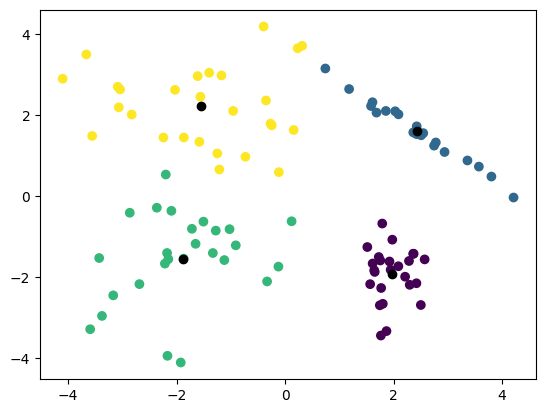

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=T)
plt.scatter(clusters[:, 0], clusters[:, 1], c='black')

In [14]:
from sklearn.metrics.pairwise import euclidean_distances

In [15]:
#сумма квадратов расстояний до центроида
sum_sq_dist = np.zeros(4)
for i in range(1, 5):
    ix = np.where(T == i)
    sum_sq_dist[i - 1] = np.sum(euclidean_distances(*X[ix, :], [clusters[i - 1]]) ** 2)
sum_sq_dist = np.sum(sum_sq_dist) / 4
sum_sq_dist

40.265351641556066

In [16]:
#средняя сумма средних внутрикластерных расстояний
sum_avg_intercluster_dist = np.zeros(4)
for i in range(1, 5):
    ix = np.where(T == i)
    sum_avg_intercluster_dist[i - 1] = np.sum(euclidean_distances(*X[ix, :], [clusters[i - 1]]) ** 2) / len(*X[ix, :])
sum_avg_intercluster_dist = np.sum(sum_avg_intercluster_dist) / 4
sum_avg_intercluster_dist

1.5744197361976733

In [17]:
#сумма межкластерных расстояний
sum_intercluster_dist = np.sum(euclidean_distances(clusters, clusters))
sum_intercluster_dist

52.045210189629415

### 7) Провести кластеризацию выборки методом k-средних. для k [1, 10].

In [18]:
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
models = []
predicted_values = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    models.append(kmeans)
    predicted_values.append(kmeans.predict(X))

In [20]:
sum_sq_dist_avg = []
for it, kmean in enumerate(models):
    sum_sq_dist_avg.append(kmean.inertia_ / (it + 1))
sum_sq_dist_avg

[887.898555329913,
 249.2200983189639,
 98.78077306138114,
 39.84843754995185,
 25.119665177735136,
 16.442316855271237,
 11.709878250041088,
 8.663695690980182,
 6.786461482361825,
 5.313407596705827]

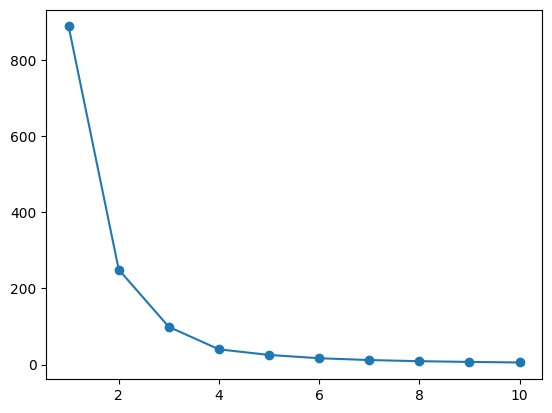

In [21]:
plt.plot(range(1, 11), sum_sq_dist_avg, '-o')

In [22]:
new_centers = [kmean.cluster_centers_ for kmean in models]

sum_avg_intercluster_dist_avg = []
for k, kmean in enumerate(models):
    intercluster_sum = np.zeros(4)
    for i in range(4):
        ix = np.where(predicted_values[k] == i)
        if len(ix[0]) == 0:
            intercluster_sum[i - 1] = 0
        else:
            intercluster_sum[i - 1] = np.sum(euclidean_distances(*X[ix, :], [kmean.cluster_centers_[i - 1]]) ** 2) / len(*X[ix, :])
    sum_avg_intercluster_dist_avg.append(np.sum(intercluster_sum) / (k + 1))
sum_avg_intercluster_dist_avg

[8.878985553299131,
 20.548525533365,
 20.768112953907305,
 23.927982520914885,
 24.30041412174638,
 12.428931811254477,
 16.701006390128313,
 16.269348864800193,
 7.617434346559047,
 9.315461734153725]

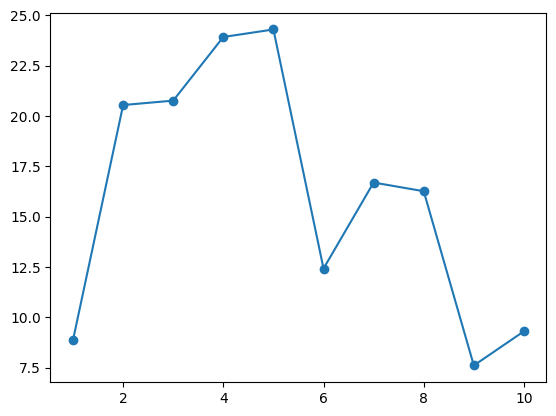

In [23]:
plt.plot(range(1, 11), sum_avg_intercluster_dist_avg, '-o')

In [24]:
sum_intercluster_dist_avg = []

for k, kmean in enumerate(models):
    value = np.sum(euclidean_distances(kmean.cluster_centers_, kmean.cluster_centers_))
    sum_intercluster_dist_avg.append(value / (k + 1))
sum_intercluster_dist_avg

[0.0,
 3.947729496172375,
 8.472101291151235,
 13.033856141682863,
 17.1902998001549,
 22.290927238858018,
 26.65610231873841,
 30.419220049466055,
 33.3064882627388,
 38.73642980359689]

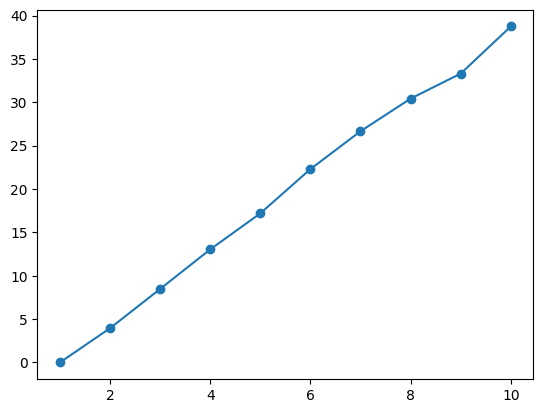

In [25]:
plt.plot(range(1, 11), sum_intercluster_dist_avg, '-o')

#### Cравнительная таблица

In [26]:
import pandas as pd

In [27]:
columns = pd.MultiIndex.from_product([['Иерархический метод', 'Метод k-средних'],
                                      ['Сумма квадратов расстояний до центроида', 'Сумма средних внутрикластерных расстояний', 'Сумма межкластерных расстояний']])
df = pd.DataFrame(columns=columns)

In [28]:
df['Иерархический метод', 'Сумма квадратов расстояний до центроида'] = [sum_sq_dist for _ in range(len(sum_sq_dist_avg))]
df['Иерархический метод', 'Сумма средних внутрикластерных расстояний'] = [sum_avg_intercluster_dist for _ in range(len(sum_avg_intercluster_dist_avg))]
df['Иерархический метод', 'Сумма межкластерных расстояний'] = [sum_intercluster_dist for _ in range(len(sum_intercluster_dist_avg))]

df['Метод k-средних', 'Сумма квадратов расстояний до центроида'] = sum_sq_dist_avg
df['Метод k-средних', 'Сумма средних внутрикластерных расстояний'] = sum_avg_intercluster_dist_avg
df['Метод k-средних', 'Сумма межкластерных расстояний'] = sum_intercluster_dist_avg

df

Иерархический метод  \
  Сумма квадратов расстояний до центроида   
0                               40.265352   
1                               40.265352   
2                               40.265352   
3                               40.265352   
4                               40.265352   
5                               40.265352   
6                               40.265352   
7                               40.265352   
8                               40.265352   
9                               40.265352   

                                                                            \
  Сумма средних внутрикластерных расстояний Сумма межкластерных расстояний   
0                                   1.57442                       52.04521   
1                                   1.57442                       52.04521   
2                                   1.57442                       52.04521   
3                                   1.57442                       52.04521   
4                                   1.57442                       52.04521   
5                                   1.57442                       52.04521   
6                                   1.57442                       52.04521   
7                                   1.57442                       52.04521   
8                                   1.57442                       52.04521   
9                                   1.57442                       52.04521   

                          Метод k-средних  \
  Сумма квадратов расстояний до центроида   
0                              887.898555   
1                              249.220098   
2                               98.780773   
3                               39.848438   
4                               25.119665   
5                               16.442317   
6                               11.709878   
7                                8.663696   
8                                6.786461   
9                                5.313408   

                                                                            
  Сумма средних внутрикластерных расстояний Сумма межкластерных расстояний  
0                                  8.878986                       0.000000  
1                                 20.548526                       3.947729  
2                                 20.768113                       8.472101  
3                                 23.927983                      13.033856  
4                                 24.300414                      17.190300  
5                                 12.428932                      22.290927  
6                                 16.701006                      26.656102  
7                                 16.269349                      30.419220  
8                                  7.617434                      33.306488  
9                                  9.315462                      38.736430

In [ ]:
df.to_excel('result.xlsx')